In [10]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [11]:
#Abrimos los fits de los bias
bias1=fits.open('Bias/Bias_1x1_00001598.fit')

bias2=fits.open('Bias/Bias_1x1_00001599.fit')

bias3=fits.open('Bias/Bias_1x1_00001600.fit')

bias4=fits.open('Bias/Bias_1x1_00001601.fit')

bias5=fits.open('Bias/Bias_1x1_00001602.fit')

In [12]:
#Abrimos los fits de los flats
flat1=fits.open('Flats/FLAT_sloan_g_B11-001.fit')

flat2=fits.open('Flats/FLAT_sloan_g_B11-002.fit')

flat3=fits.open('Flats/FLAT_sloan_g_B11-003.fit')

flat4=fits.open('Flats/FLAT_sloan_g_B11-004.fit')

flat5=fits.open('Flats/FLAT_sloan_g_B11-005.fit')

In [13]:
#Abrimos los fits de los darks
dark1=fits.open('Darks/Dark_30.000secs_00000189.fit')

dark2=fits.open('Darks/Dark_30.000secs_00000193.fit')

dark3=fits.open('Darks/Dark_30.000secs_00000197.fit')

dark4=fits.open('Darks/Dark_30.000secs_00000201.fit')

dark5=fits.open('Darks/Dark_30.000secs_00000205.fit')

In [15]:
#Abrimos los fits de los lights
light1=fits.open('Lights/Light_IC_4725_sloan_g_30.000secs_00000129.fit')

light2=fits.open('Lights/Light_IC_4725_sloan_g_30.000secs_00000131.fit')

light3=fits.open('Lights/Light_IC_4725_sloan_g_30.000secs_00000132.fit')

In [16]:
#Veamos que contiene el fits
light1.info()

Filename: Lights/Light_IC_4725_sloan_g_30.000secs_00000129.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   (4096, 4096)   int16 (rescales to uint16)   


In [17]:
#Abrimos el header
light1[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBSERVER= 'Baier   '           / SBIGFITSEXT The name of the observer           
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '        

In [18]:
#Datos de las cuentas de la imagen
light1[0].data

array([[ 83,  91,  89, ...,  89,  84,  86],
       [ 94,  96,  98, ...,  92,  92,  95],
       [110,  96,  99, ...,  87,  84,  88],
       ...,
       [ 86,  88,  82, ...,  89,  86,  84],
       [ 82,  89,  83, ...,  89,  90,  66],
       [ 96,  91,  97, ...,  82,  72,  87]], dtype=uint16)

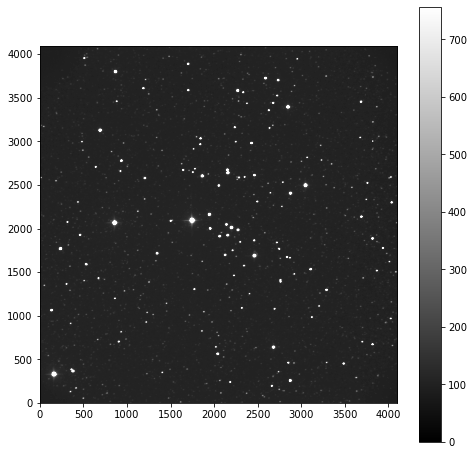

In [75]:
#Veamos como se ve
plt.figure(figsize=(8,8))
plt.imshow(light1[0].data,cmap='gray', origin='lower',\
           vmin=0, vmax=np.mean(light1[0].data)+np.std(light1[0].data))
plt.colorbar()
plt.show()

In [22]:
#Generamos un master bias
master_bias= np.mean(np.array([bias1[0].data,bias2[0].data,bias3[0].data,bias4[0].data,\
                               bias5[0].data]), axis=0)

In [25]:
#Generamos un master dark (con bias incluído)
master_dark= np.mean(np.array([dark1[0].data,dark2[0].data,dark3[0].data,dark4[0].data,\
                               dark5[0].data]), axis=0)

In [30]:
#Generamos un master flat normalizado
flats= np.mean(np.array([flat1[0].data,flat2[0].data,flat3[0].data,flat4[0].data,\
                        flat5[0].data]),axis=0)

master_flat_bias= (flats-master_bias)/(np.median(flats-master_bias))

master_flat_dark= (flats-master_dark)/(np.median(flats-master_dark))

In [66]:
#Pequeño arreglo
master_flat_dark[master_flat_dark==0]=0.0001
master_flat_bias[master_flat_bias==0]=0.0001

In [67]:
#Ahora limpiemos un imágen de forma (light-master dark)/(master flat), dependiendo del tiempo
#de exposición se puede usar el master bias en vez de master dark
imagen1=(light1[0].data-master_dark)/master_flat_dark

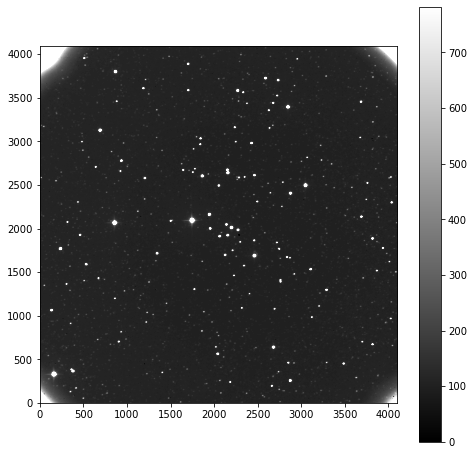

In [74]:
#Veamos como queda
plt.figure(figsize=(8,8))
plt.imshow(imagen1,cmap='gray', origin='lower',\
           vmin=0, vmax=np.mean(imagen1)+np.std(imagen1))
plt.colorbar()
plt.show()

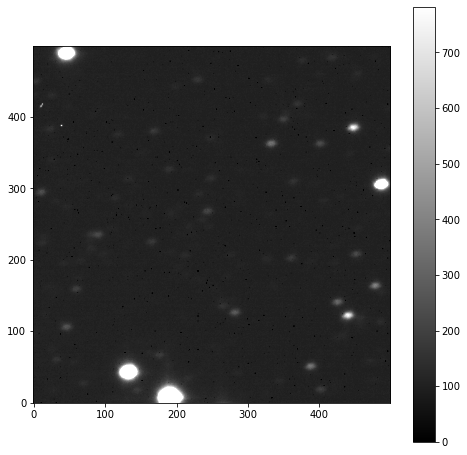

In [76]:
#Veamos más de cerca
plt.figure(figsize=(8,8))
plt.imshow(imagen1[2000:2500,2000:2500],cmap='gray', origin='lower',\
           vmin=0, vmax=np.mean(imagen1)+np.std(imagen1))
plt.colorbar()
plt.show()

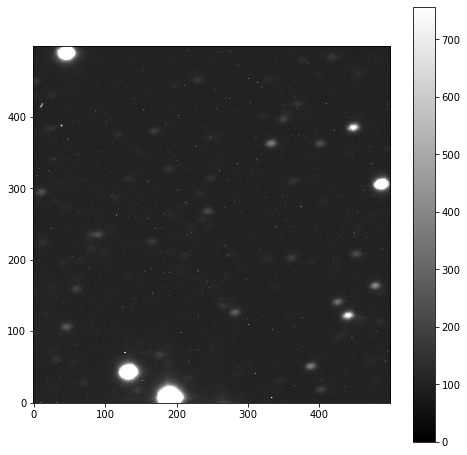

In [77]:
plt.figure(figsize=(8,8))
plt.imshow(light1[0].data[2000:2500,2000:2500],cmap='gray', origin='lower',\
           vmin=0, vmax=np.mean(light1[0].data)+np.std(light1[0].data))
plt.colorbar()
plt.show()